### Thresholding, Binarization & Adaptive Thresholding

In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-06 04:54:52--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.166
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.8MB/s    in 2.0s    

2022-06-06 04:54:55 (13.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2022-06-06 04:54:55--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.02s   

2022-06-06 04:54:56 (10.3 MB/s) - ‘scan.jpeg’ saved [171933/171933]



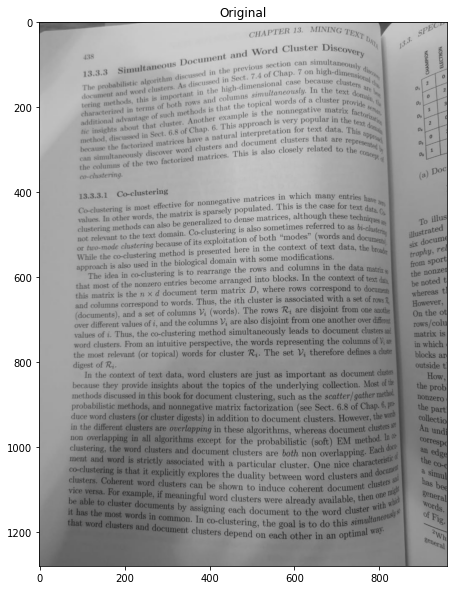

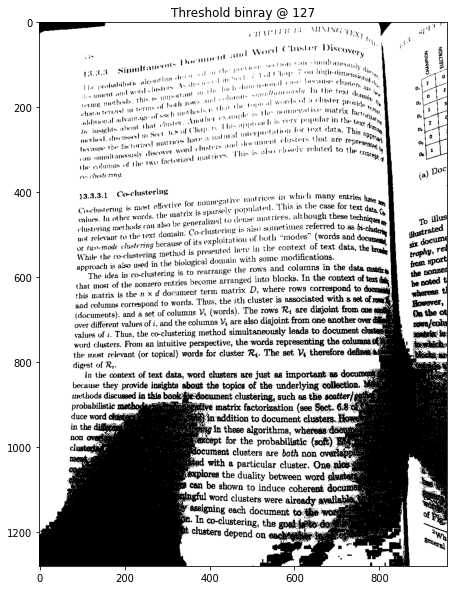

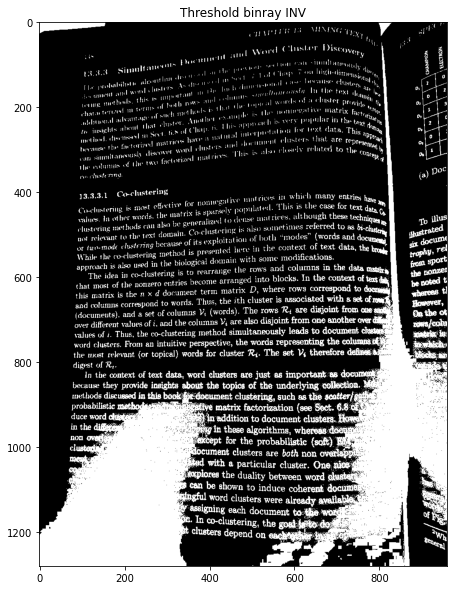

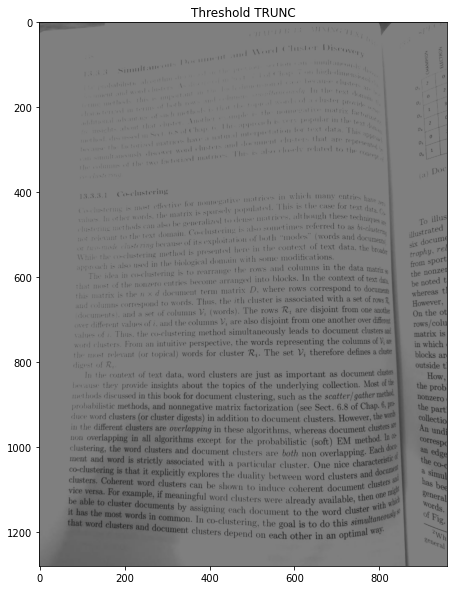

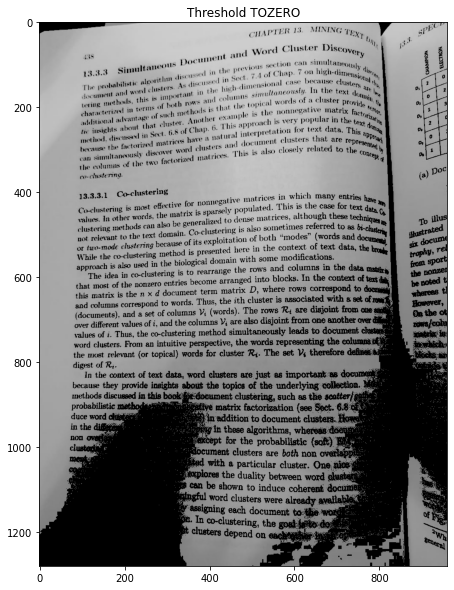

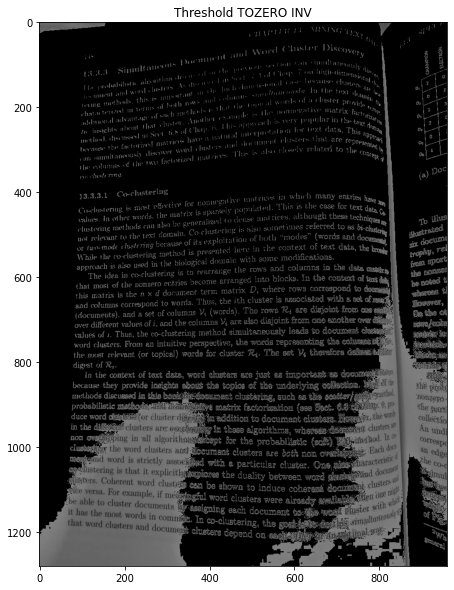

In [4]:
# load image as grayscale
image = cv2.imread("/content/scan.jpeg", 0)
imshow("Original", image)

# values below 127 goes to 0 (black) and everything above goes to 255 (white)
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow("Threshold binray @ 127", thresh1)

# Reverse of above
ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow("Threshold binray INV", thresh2)

# values above 127 are truncated (held) at 127 (The 255 argument is unused)
ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow("Threshold TRUNC", thresh3)

# values above 127 goes to 0, above are unchanged.
ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow("Threshold TOZERO", thresh4)

# Reverse of the above
ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow("Threshold TOZERO INV", thresh5)

### Adaptive Threshold


1.   ADAPTIVE_THRESHOLD_MEAN_C
2.   THRESHOLD_OTSU

### cv2.adaptiveThreshold parameters

cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, c[, dst])





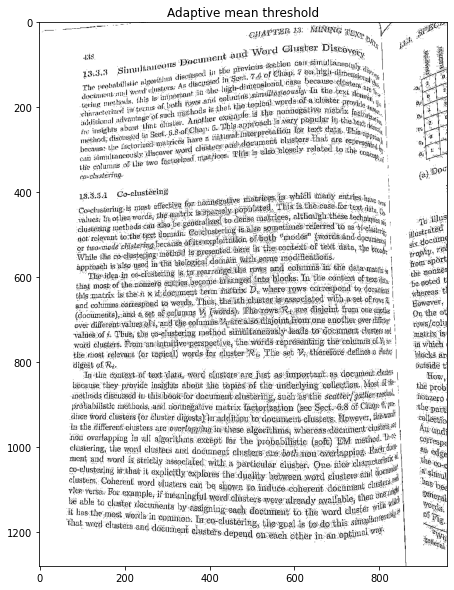

In [7]:
# It's good practice to blur image as it removes noise
# cv2.GaussianBlur(image, (3,3), 0)

# using adaptive threshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow("Adaptive mean threshold", thresh)

# OTSU thresholding
th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#imshow("OTSU thresholding", th2)

# OTSU thresholding after gaussian filtering
blur = cv2.GaussianBlur(image, (3,3), 0)
th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#imshow("OTSU thresholding after gaussian blur", th3)

### SKImage threshold local

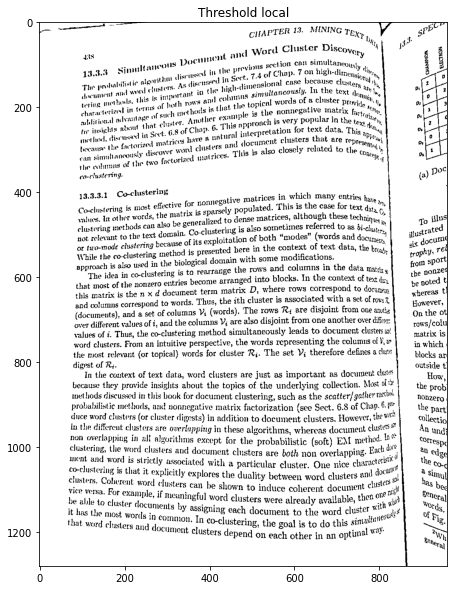

In [9]:
from skimage.filters import threshold_local

image = cv2.imread("/content/scan.jpeg")

# We get the value component from HSV color space
# then we apply adaptive thresholding
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("Threshold local", thresh)